In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Equities', 'Foreign') + ['VT', 'ACWI'], 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-26 to 2019-07-10 - 77


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

45


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
RSX,47,1.205625,1.746015,0.667774,12.605046,4.174395
EWA,47,0.610935,1.529552,0.373477,4.687271,3.100777
EWL,47,0.583922,1.480142,0.367694,5.163036,3.113807
EWZ,47,1.301278,3.718857,0.339243,14.727084,10.630581
EFAV,47,0.400662,1.068829,0.337733,3.715280,2.819624
VIGI,47,0.367774,1.497127,0.219147,3.313671,4.587566
ILF,47,0.583828,2.761801,0.197026,5.634462,9.952474
EPP,47,0.363825,1.688973,0.191917,2.515180,4.599415
EWC,47,0.298889,1.512161,0.171415,2.719472,4.273205


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted EWH 0.898 0.336
evicted DGS 0.666 0.401
evicted EWG 0.878 0.086
evicted EWC 0.866 0.150
evicted EFAV 0.817 0.247
evicted EWA 0.640 0.245
evicted EWZ 0.413 0.413
retry backlogs ['IEV', 'VGK', 'VEU', 'ACWX', 'VPL', 'VXUS', 'GSIE', 'EFA', 'VEA', 'IXUS', 'HEFA', 'IDEV', 'IEFA', 'EZU', 'ACWI', 'PXH', 'DEM', 'INTF', 'SCHF', 'CWI', 'IEUR', 'SPDW', 'DBEF', 'VSS', 'ILF', 'FNDE', 'VYMI', 'EWJ', 'VT', 'RODM', 'EWL', 'VIGI', 'FEZ', 'EFG', 'EPP', 'IPAC', 'HEDJ'] at 0.905/-0.51 - 0.668
evicted FNDE 0.850 0.604
evicted EPP 0.878 0.512
evicted RODM 0.848 0.410
evicted EWL 0.809 0.364
evicted ILF 0.571 0.571
retry backlogs ['VXUS', 'VEA', 'ACWX', 'EZU', 'CWI', 'SCHF', 'IXUS', 'IDEV', 'VEU', 'VGK', 'IEFA', 'IEV', 'HEFA', 'IEUR', 'VPL', 'PXH', 'EFA', 'ACWI', 'INTF', 'SPDW', 'EWJ', 'VYMI', 'DEM', 'VSS', 'VT', 'GSIE', 'FEZ', 'VIGI', 'HEDJ', 'EFG', 'DBEF', 'IPAC'] at 0.910/-0.52 - 0.668
evicted DEM 0.884 0.634
evicted FEZ 0.707 0.707
retry backlogs ['VEA', 'VXUS', 'GSIE', 'SCHF', 'VGK', 'IEV', 'EZU'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
RSX,47.0,1.205625,1.746015,-3.457943,0.065595,1.290319,2.402487,4.199471,0.667774,12.605046,4.174395
Portfolio,47.0,1.205625,1.746015,-3.457943,0.065595,1.290319,2.402487,4.199471,0.667774,12.605046,4.174395


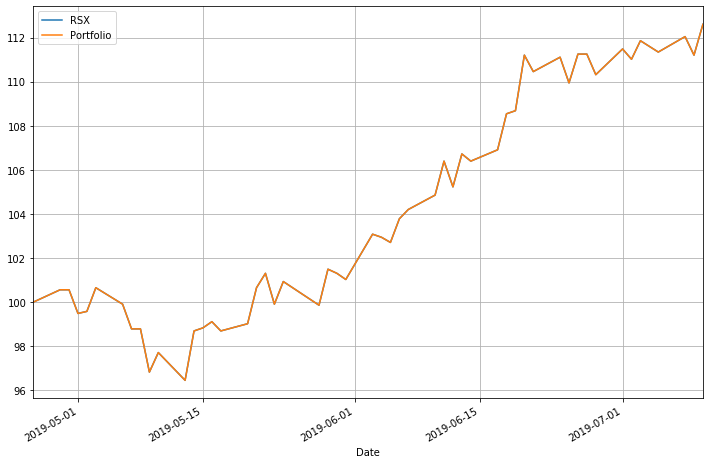

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)